# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [38]:
import pandas as pd
import numpy as np
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-0.15.1-py3-none-any.whl (298 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=db622291978682c14856d595c9a34e4345ab94c8d1d95f122da5e2b6aef7fd56
  Stored in directory: c:\users\pantufa\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [39]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

In [3]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
black_friday.shape

(537577, 12)

In [5]:
#conferindo as colunas
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#conferindo os tipos de variável nas colunas
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
#conferindo os dados gerais do DF
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
#mudando o nome do DF original para mexer sem estragar
dados = black_friday
dados.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Questão 1: Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple (n_observacoes, n_colunas).

In [9]:
#usando o shape do pandas
dados.shape

(537577, 12)

### Questão 2: Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [10]:
#verificando qual a porcentagem de mulheres e homens, just because
#o dataset tem aproximadamente 75% de homens e 25% de mulheres
dados['Gender'].value_counts(normalize=True)

M    0.754087
F    0.245913
Name: Gender, dtype: float64

In [11]:
#conferindo os tipos de Age
dados['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#fazendo uma query do Pandas
mulheres_jovens = dados.query("Gender == 'F' and Age == '26-35'")
mulheres_jovens.shape[0]

49348

In [13]:
#incluindo a resposta numa variável
q2 = mulheres_jovens.shape[0]
q2

49348

### Questão 3: Quantos usuários únicos há no dataset? Responda como um único escalar.

In [14]:
#somando os usuários únicos usando a função nunique do pandas na coluna User_ID
#dados['User_ID'].nunique()
#colocando a resposta numa variável
q3 = dados['User_ID'].nunique()
q3

5891

### Questão 4: Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [15]:
#tentando usar o nunique com o dtypes
dados.dtypes.nunique()

3

In [16]:
#incluindo numa variável
q4 = dados.dtypes.nunique()
q4

3

### Questão 5: Qual porcentagem dos registros possui ao menos um valor null (None, ǸaN etc)? Responda como um único escalar entre 0 e 1.

In [17]:
#vamos ver um trem aqui
dados.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [18]:
#contando os dados não nulos usando o count
nao_nulos = dados.count().sum()
nao_nulos

5910639

In [19]:
#somando os dados nulos - o primeiro sum soma por coluna, o segundo soma tudo
nulos = dados.isna().sum().sum()
nulos

540285

In [20]:
#compilando
total_de_dados = nulos + nao_nulos 
total_de_dados

6450924

In [21]:
#dividindo os nulos pelo total devo ter uma resposta em float
q5 = nulos/total_de_dados
q5

0.08375311815795691

### Questão 6: Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [22]:
#contando dados não nulos novamente
dados.count()


User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            370591
Product_Category_3            164278
Purchase                      537577
dtype: int64

In [23]:
#conferindo o valor mínimo de dados não nulos
dados.count().min()

164278

In [24]:
#contando nulos na coluna "Product_Category_3"
dados['Product_Category_3'].isna().sum()

373299

In [25]:
#colocando na variável
q6 = dados['Product_Category_3'].isna().sum()
q6

373299

### Questão 7: Qual o valor mais frequente (sem contar nulls) em Product_Category_3? Responda como um único escalar.

In [26]:
#usando a moda
dados['Product_Category_3'].mode()[0]

16.0

In [27]:
q7 = dados['Product_Category_3'].mode()[0]
q7

16.0

### Questão 8: Qual a nova média da variável (coluna) Purchase após sua normalização? Responda como um único escalar.

In [28]:
#visualizando a coluna
dados['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 537577, dtype: int64

In [29]:
#contando os nulos
dados['Purchase'].isna().sum()


0

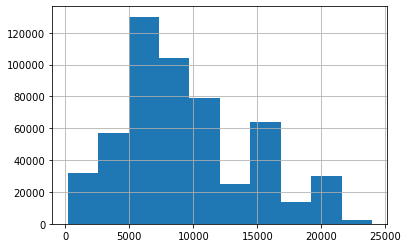

In [30]:
#plotar a distribuição da variável
dados['Purchase'].hist()

In [31]:
#conferindo a média antes
media = dados['Purchase'].mean()
media

9333.859852635065

In [32]:
desvio_padrao = dados['Purchase'].std()

In [33]:
#normalizando pela média (roubartilhado diretamente do StackOverflow)
novos_dados = dados['Purchase']-media/desvio_padrao
novos_dados

0          8368.126116
1         15198.126116
2          1420.126116
3          1055.126116
4          7967.126116
              ...     
537572    11662.126116
537573    19194.126116
537574     8041.126116
537575     7170.126116
537576     6873.126116
Name: Purchase, Length: 537577, dtype: float64

In [34]:
#nova média - normalizando pela média
novos_dados.mean()

9331.985968198494

In [35]:
#incluindo na variável
q8 = novos_dados.mean()
q8

9331.985968198494

In [50]:
#normalizando com min max direto com o Pandas = normalized_df=(df-df.min())/(df.max()-df.min())
#criando variável para ficar mais legível
compras = dados['Purchase']
minimo = compras.min()
maximo = compras.max()

compras_normalizado = (compras - minimo)/(maximo - minimo)
compras_normalizado



0         0.344255
1         0.631519
2         0.052027
3         0.036676
4         0.327389
            ...   
537572    0.482798
537573    0.799588
537574    0.330501
537575    0.293868
537576    0.281376
Name: Purchase, Length: 537577, dtype: float64

In [51]:
#média normalizada por mínimo e máximo
compras_normalizado.mean()

0.3847939036269795

In [52]:
#considerando a questão 9, vamos colocar esta resposta como a oficial
q8 = compras_normalizado.mean()
q8


0.3847939036269795

### Questão 9: Quantas ocorrências entre -1 e 1 inclusive existem da variáel Purchase após sua padronização? Responda como um único escalar.

In [55]:
compras = pd.DataFrame(compras_normalizado)
compras

,Purchase
0,0.344255
1,0.631519
2,0.052027
3,0.036676
4,0.327389
...,...
537572,0.482798
537573,0.799588
537574,0.330501
537575,0.293868


In [59]:
compras.describe()

,Purchase
count,537577.000000
mean,0.384794
std,0.209498
min,0.000000
25%,0.238938
50%,0.331300
75%,0.500000
max,1.000000


In [61]:
compras.isna().sum()

Purchase    0
dtype: int64

In [63]:
#se o valor mínimo é 0 e o valor máximo é 1, então todos os valores estão entre -1 e 1
q9 = compras.count()[0]
q9

537577

### Questão 10: Podemos afirmar que se uma observação é null em Product_Category_2 ela também o é em Product_Category_3? Responda com um bool (True, False).

In [68]:
#solução roubartilhada
dados_comparacao = dados[dados['Product_Category_2'].isna()]
dados_comparacao
   

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
537563,1004736,P00154642,M,18-25,20,A,1,1,8,NaN,NaN,6074
537565,1004736,P00051142,M,18-25,20,A,1,1,8,NaN,NaN,7934
537566,1004736,P00048742,M,18-25,20,A,1,1,5,NaN,NaN,5350
537568,1004736,P00250642,M,18-25,20,A,1,1,11,NaN,NaN,5930


In [70]:
dados_comparacao['Product_Category_2'].equals(dados_comparacao['Product_Category_3'])

True

In [72]:
q10 = dados_comparacao['Product_Category_2'].equals(dados_comparacao['Product_Category_3'])
q10

True

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [ ]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [ ]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return q2

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [ ]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return q3

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [ ]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return q4

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [ ]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return q5

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [ ]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return q6

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [ ]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return q7

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [ ]:
def q8():
    # Retorne aqui o resultado da questão 8.
    return q8

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [ ]:
def q9():
    # Retorne aqui o resultado da questão 9.
    return q9

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [ ]:
def q10():
    # Retorne aqui o resultado da questão 10.
    return q10